## HYPOTHESIS TESTING---MEN & WOMEN FIFA WORLD CUP MATCHES

You're working as a sports journalist at a major online sports media company, specializing in 
soccer analysis and reporting. You've been watching both men's and women's international soccer 
matches for a number of years, and your gut instinct tells you that more goals are scored in women's 
international football matches than men's. This would make an interesting investigative article that 
your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to 
be sure! 


While scoping this project, you acknowledge that the sport has changed a lot over the years, and 
performances likely vary a lot depending on the tournament, so you decide to limit the data used 
in the analysis to only official FIFA World Cup matches (not including qualifiers) since 2002-01-01. 

You create two datasets containing the results of every official men's and women's international 
football match since the 19th century, which you scraped from a reliable online source. This data 
is stored in two CSV files: women_results.csv and men_results.csv in a zip file named 
sport_data.zip. 


The research question you are trying to determine the answer to is: 

Are more goals scored in women's international soccer matches than men's? 

You assume a 10% significance level, and use the following null and alternative hypotheses: 

H0: The mean number of goals scored in women's international soccer matches is the same as 
men's. 

H1: The mean number of goals scored in women's international soccer matches is greater than 
men's 


Task: 

Perform an appropriate hypothesis test to determine the p-value, and hence result, of whether to 
reject or fail to reject the null hypothesis that the mean number of goals scored in women's 
international soccer matches is the same as men's. Use a 10% significance level. 

For this analysis, 
you'll use Official FIFA World Cup matches since 2002-01-01, and you'll also assume that each 
match is fully independent, i.e., team form is ignored. 

In [2]:
# import necessary libraries
import pandas as pd
men = pd.read_csv(r"C:\Users\USER\Desktop\DATA ANALYSIS CLASS\VSCODE\DATASET\PROJECT\sport_data (2)\sport_data\men_results.csv")
men["tournament"].unique() # checks for unique tournament in the data
only_fifa = men.query("tournament == 'FIFA World Cup'") # filter to contain only FIFA
only_fifa = only_fifa.copy()
only_fifa["grand_score" ]= only_fifa.iloc[:,[4,5]].sum(axis = 1) # adds both home and away scores in the data
m_mean = only_fifa["grand_score"].mean()
print(f"Mean = {m_mean:.2f}\nSD = {(only_fifa["grand_score"].std()):.2f}")



Mean = 2.82
SD = 1.93


In [3]:
women = pd.read_csv(r"C:\Users\USER\Desktop\DATA ANALYSIS CLASS\VSCODE\DATASET\PROJECT\sport_data (2)\sport_data\women_results.csv")
women["tournament"]
f_fifa = women.query("tournament == 'FIFA World Cup'")
f_fifa = f_fifa.copy()
f_fifa["grand_score"] = f_fifa.loc[:, ["home_score", "away_score"]].sum(axis = 1)
f_mean = f_fifa["grand_score"].mean()
print(f"Mean = {f_mean:.2f}\nSD = {(f_fifa["grand_score"].std()):.2f}")


Mean = 3.23
SD = 2.06


H0: The mean number of goals scored in women's international soccer matches is the same as 
men's. 

H1: The mean number of goals scored in women's international soccer matches is greater than 
men's 

In [4]:
import scipy.stats as st
result = st.ttest_ind(only_fifa["grand_score"], f_fifa["grand_score"]) # carry out an independent sampe ttest
statistics = result[0]
pval = result[1]
print(f"Statistic: {result[0]}\nPvalue: {result[1]}")

# pval is less that 0.1 hence, we reject the null hypothesis

Statistic: -3.080149622302865
Pvalue: 0.002114261290133323


In [48]:
new_data = pd.concat([only_fifa, f_fifa], keys = ["Men", "Women"]) # combines both dataset
sport_data  = new_data.reset_index(level = [0]) # resets to a single index
sport_data = sport_data.rename(columns = {"level_0": "Gender"}) 
sport_data.head()

,Gender,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,grand_score
1311,Men,1311,1930-07-13,Belgium,United States,0,3,FIFA World Cup,3
1312,Men,1312,1930-07-13,France,Mexico,4,1,FIFA World Cup,5
1313,Men,1313,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,3
1314,Men,1314,1930-07-14,Peru,Romania,1,3,FIFA World Cup,4
1315,Men,1315,1930-07-15,Argentina,France,1,0,FIFA World Cup,1


<Axes: xlabel='Gender', ylabel='grand_score'>

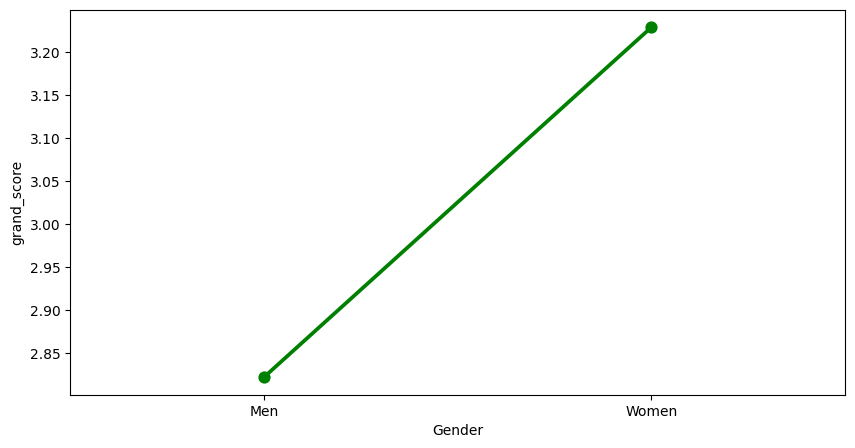

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.pointplot(data = sport_data, x= "Gender", y = "grand_score", errorbar=None, color = "g")

# The pointplot shows the difference in mean scores of both women and men

## Analysis result

An independent samples t-test was conducted to examine if more goals are scored in women's 
international soccer matches than men's.
The analysis revealed a statistically significant difference in the number of goals 
scored between men and women's international soccer matches. Women's international 
soccer team(M = 3.23, SD= 2.06) had significantly higher number of goals scored 
compared to men (M =2.82, SD= 1.92 ), with a mean difference of 0.41 as shown in the plot above.

Therefore, the null hypothesis is **not accepted** This implies 
that more goals are scored in women's 
international football matches than men's.